## Add imports

In [1]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

### Load dataset

In [2]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (7242,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch water,forest,field,city
Processing water
Size of water is 155000
Processing forest
Size of forest is 456100
Processing field
Size of field is 837600
Processing city
Size of city is 307500
Train size: 1404960. Test size: 351240


### Transform to binary tree

In [3]:
from dataset_tool.dataset_tree_transformer import *
importlib.reload(dataset_tool.dataset_tree_transformer)


<module 'dataset_tool.dataset_tree_transformer' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_tree_transformer.py'>

In [4]:
dataset_tree = DatasetTreeAdapter(dataset)

COnfig path /tmp/pycharm_project_568/Classification/dataset_config
categories tree string ["water",["forest",["field","city"]]]
List array ['water', ['forest', ['field', 'city']]].
Creating dataset: train len: 1404960 test len: 351240
Creating dataset: train len: 1280916 test len: 320284
Creating dataset: train len: 916227 test len: 228873


In [5]:
dataset_tree.dataset_tree

In [6]:
#importlib.reload(dataset_tool.KNNClassifier)
from dataset_tool.KNNClassifier import *





### Use KNN-C

#### Model fit

In [7]:
knn_classifier = KNNClassifier(dataset_tree.dataset_tree)

In [8]:
knn_classifier.fit()

Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]


In [9]:
knn_classifier.predict_test()

Start prediction test data:
Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]
Working with: idx 0 and shape (351240, 12)...
Working with: idx 1 and shape (320284, 12)...
Working with: idx 2 and shape (228873, 12)...


#### Get classification report

In [10]:
import cuml
type(knn_classifier.models[0]) == cuml.internals.base_helpers.BaseMetaClass

False

In [11]:
from dataset_tool.classification_report_creator import *

In [12]:
knn_report_creator = ClassificationReportCreator(knn_classifier.predictions,dataset_tree.dataset_tree)

In [13]:
knn_report_creator.display_tree_predictions()

Get accureacy for 0 iteration
Accureacy 0.9984056353569031
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     30766
           2       1.00      1.00      1.00    320474

    accuracy                           1.00    351240
   macro avg       0.99      1.00      1.00    351240
weighted avg       1.00      1.00      1.00    351240

Get accureacy for 1 iteration
Accureacy 0.9673258662223816
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     91266
           2       0.98      0.98      0.98    229018

    accuracy                           0.97    320284
   macro avg       0.96      0.96      0.96    320284
weighted avg       0.97      0.97      0.97    320284

Get accureacy for 2 iteration
Accureacy 0.9957618713378906
              precision    recall  f1-score   support

           1       1.00      0.99      1.00    168010
           2       0.99      1.00      0.99     60863

    a

In [14]:
import numpy as np
arrr = np.asarray([1,2,3,4,5,6])

In [15]:
np.delete(arrr,[0,3,5])

array([2, 3, 5])

### Gaussian naive Bayes

#### GNB fit

In [16]:
from dataset_tool.NBClassifier import *

In [17]:
gnb_classifier = GaussianNBClassiefier(dataset_tree.dataset_tree)

In [18]:
gnb_classifier.fit()

Models [GaussianNB(), GaussianNB(), GaussianNB()]


In [19]:
gnb_classifier.predict_test()

Start prediction test data:
Models [GaussianNB(), GaussianNB(), GaussianNB()]
Working with: idx 0 and shape (351240, 12)...
Working with: idx 1 and shape (320284, 12)...
Working with: idx 2 and shape (228873, 12)...


### SVM fit

In [20]:
from dataset_tool.SVMClassifier import *

In [21]:
svm_classifier = SVMClassiefier(dataset_tree.dataset_tree)

In [22]:
svm_classifier.fit()

Models [SVC(), SVC(), SVC()]


## Predict on test image

In [23]:
from dataset_tool.real_prediction import *
#importlib.reload(dataset_tool.real_prediction)

In [24]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [25]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", knn_classifier.models)

In [62]:
real_prediction_gnb = RealPrediction("/tmp/shared/dataset4/2", gnb_classifier.models)

In [63]:
real_prediction_svc = RealPrediction("/tmp/shared/dataset4/2", svm_classifier.models)

In [27]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [28]:
real_prediction_knn.predict()

In [29]:
real_prediction_gnb.predict()

In [64]:
real_prediction_svc.predict()

In [30]:
real_prediction_knn

In [31]:
real_prediction_knn.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (446164,)
Predcition: 1. Len of idxs: 192968. New array shape: (639132,)
Predcition: 0. Len of idxs: 58840. New array shape: (697972,)


In [32]:
real_prediction_gnb.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (607234,)
Predcition: 1. Len of idxs: 32082. New array shape: (639316,)
Predcition: 0. Len of idxs: 58656. New array shape: (697972,)


In [65]:
real_prediction_svc.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (536408,)
Predcition: 1. Len of idxs: 100243. New array shape: (636651,)
Predcition: 0. Len of idxs: 61321. New array shape: (697972,)


In [33]:
im = real_prediction_knn.to2d()

In [34]:
im_gnb = real_prediction_gnb.to2d()

In [66]:
im_svc = real_prediction_svc.to2d()

In [35]:
real_prediction_knn.height

638

In [36]:
# arr1 = np.asarray([1,2,3])
# arr1_idx = np.asarray([2,4,5])
# arr2 = np.asarray([11,22,33,44,55,66,77,88])
# shapes = arr1.shape[0]+arr2.shape[0]
# arr3 = np.empty(shapes, dtype=float)
# arr3[arr1_idx] = arr1
# arr3[~np.isin(np.arange(arr3.shape[0]), arr1_idx)] = arr2
# arr3

In [37]:
predictions = real_prediction_knn.predictions

In [38]:
len(predictions[2][0])

0

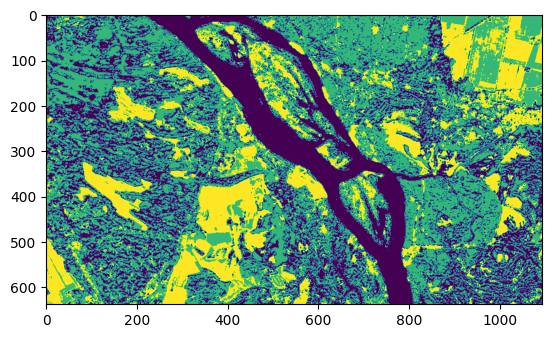

In [39]:
import matplotlib.pyplot as plt

plt.imshow(im)

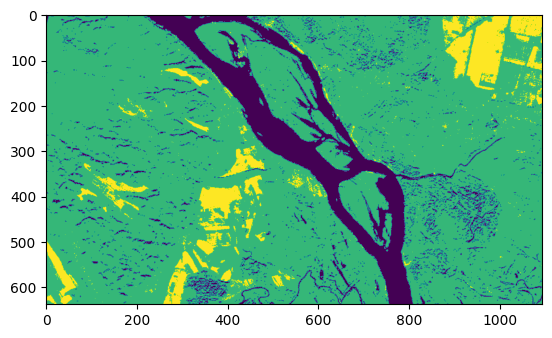

In [40]:
plt.imshow(im_gnb)

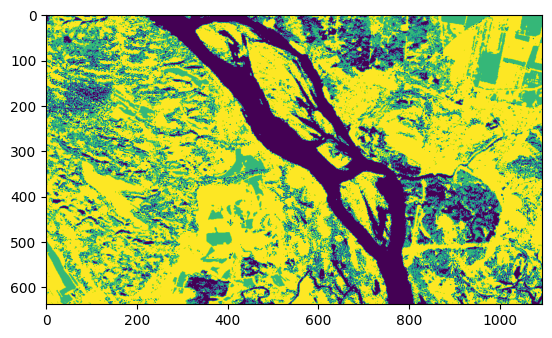

In [67]:
plt.imshow(im_svc)

In [41]:
real_prediction_knn.predict_proba()

In [42]:
#real_prediction_knn.flatten_proba()

In [43]:
real_prediction_knn.predictions[0][1][0]

1

In [44]:
real_prediction_knn.predictions_proba[0][1]

array([[1.0000001, 0.       ],
       [1.0000001, 0.       ],
       [1.0000001, 0.       ],
       ...,
       [0.       , 1.0000001],
       [0.       , 1.0000001],
       [0.       , 1.0000001]], dtype=float32)

In [45]:
# def flatten_proba(self):
#     array = np.empty(0)
#     for index, item in reversed(list(enumerate(self.predictions_proba))):
#         new_array = np.empty((array.shape[0] + item[1].shape[0],2), dtype=float)
#         print(f"Predcition: {item[2]}. Len of idxs: {len(item[0])}. New array shape: {new_array.shape}")
#         new_items = item[1] + item[2]
#         if len(item[0]) == 0:
#             new_array[np.arange(item[1].shape[0])] = new_items
#         else:
#             new_array[item[0]] = item[1]
#             new_array[~np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = array
#         array = new_array
#     self.predictions_composite_proba = array

In [46]:
import numpy as np

item1 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])
item2 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])

In [47]:
# item1_1 = item1[0]
# item2_1 = item2[0]

In [48]:
# item3 = item1[0][2] * item2_1

In [49]:
result = item1 * item2[:, 0][:, np.newaxis]

In [50]:
result

array([[0.04  , 0.16  ],
       [0.09  , 0.21  ],
       [0.04  , 0.16  ],
       [0.16  , 0.24  ],
       [0.0625, 0.1875]])

In [51]:
result = np.hstack((item1, result, result * item2[:, 1][:, np.newaxis]))

In [52]:
result

array([[0.2     , 0.8     , 0.04    , 0.16    , 0.032   , 0.128   ],
       [0.3     , 0.7     , 0.09    , 0.21    , 0.063   , 0.147   ],
       [0.2     , 0.8     , 0.04    , 0.16    , 0.032   , 0.128   ],
       [0.4     , 0.6     , 0.16    , 0.24    , 0.096   , 0.144   ],
       [0.25    , 0.75    , 0.0625  , 0.1875  , 0.046875, 0.140625]])

In [53]:
result2 = np.hstack((item1, (item1 * item2).sum(axis=1, keepdims=True)))

In [54]:
result2

array([[0.2  , 0.8  , 0.68 ],
       [0.3  , 0.7  , 0.58 ],
       [0.2  , 0.8  , 0.68 ],
       [0.4  , 0.6  , 0.52 ],
       [0.25 , 0.75 , 0.625]])

In [55]:
item1[0][1]*item2[0]

array([0.16, 0.64])

In [56]:
item1[0][1]

0.8

In [57]:
item2[0]

array([0.2, 0.8])

In [58]:
i1 = item1[:,1][:,np.newaxis] * item2

In [59]:
i2 = item1[:,0]

In [60]:
np.zstack(i2,i1)

AttributeError: module 'numpy' has no attribute 'zstack'

In [ ]:
i1.shape

In [ ]:
i2.shape

In [ ]:
np.hstack((i2[:, np.newaxis], i1))

In [ ]:
probas = np.asarray(real_prediction_knn.predictions_proba)

In [ ]:
probas.shape

In [ ]:
# def flatten_probas():
#     new_array = np.empty(0)
#
#     for idx, item in enumerate(probas):
#         print(f"idx: {idx}")
#         if idx == 0:
#             new_array = item
#         else:
#             i1 = new_array[:, idx][:,np.newaxis] * item
#             i2 = new_array[:,:idx]
#             new_array = np.hstack((i2, i1))
#
#     return new_array

In [ ]:
# arrrrr = flatten_probas()

In [ ]:
# arrrrr.shape

In [ ]:
# from dataset_tool.graph_utils import *
#
# createHistGraph(arrrrr, dataset.categories_map)

In [ ]:
i2 = arrrrr[:, :1]

In [ ]:
i1.shape

In [ ]:
np.hstack((i2,i1))

In [ ]:
probas[1]